In [21]:
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
df = pd.read_csv('Group_11_Question_1_Data.csv', index_col=0)
df.head()

,Period 1,Period 2
0,27.680136,12.336870
1,32.914177,11.868782
2,30.806953,13.069898
3,33.417412,12.895928
4,22.121046,12.910894


In [4]:
df.describe()

,Period 1,Period 2
count,20.000000,20.000000
mean,26.429001,12.755438
std,6.174648,1.310644
min,11.619726,11.239848
25%,23.946297,11.922177
50%,27.201267,12.534074
75%,30.982160,12.957735
max,33.417412,17.255720


In [46]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [47]:
check_normality(df["Period 1"])
check_normality(df["Period 2"])

p value:0.0188
Reject null hypothesis >> The data is not normally distributed
p value:0.0005
Reject null hypothesis >> The data is not normally distributed


array([[<AxesSubplot:title={'center':'Period 1'}>,
        <AxesSubplot:title={'center':'Period 2'}>]], dtype=object)

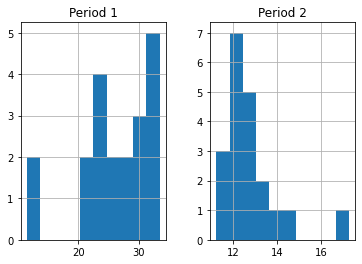

In [15]:
df.hist()

## Wilcoxon Rank-Sum / Mann Whitney U Test

Assuming:
1. The populations are continuous
2. The probability density functions are of the same size and shape, but onlyshifted in location

(#2 is shaky, but possible if assuming that the measurment method provides the same distribution, but shifted, for Kappa regardless of type of wood)

Let

* H<sub>0</sub>: The distributions for Periods 1 and 2 are identical
* H<sub>1</sub>: The distributions for Periods 1 and 2 are different

A confidence level of 95% will be required to reject the null hypothesis in favor of the alternative

In [50]:
def test_hypothesis():
    U, p = stats.mannwhitneyu(df["Period 1"], df["Period 2"])

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The distributions for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The distributions for Periods 1 and 2 are identical")

test_hypothesis()

p value:0.0000039874
Reject null hypothesis >> The distributions for Periods 1 and 2 are different
